In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX

import sys
sys.path.append('/home/dimia/code/elpbcn/air-pollution-levels')
from airpollutionlevels.config import resolve_path

# Data 

In [147]:
csv_file = resolve_path('airpollutionlevels/raw_data/monthly_pollution_europe.csv')
data = pd.read_csv(csv_file)

In [148]:
# Convert PM10 from kg/m³ to mg/m³
data['pm10'] = data['pm10'] * 1e9

# Convert PM2.5 from kg/m³ to mg/m³
data['pm2p5'] = data['pm2p5'] * 1e9

In [149]:
data

,year,month,latitude,longitude,time,pm10,pm2p5
0,2023,1,35.0,-25.00,2023-01-16 09:00:00,9.339834,4.953766
1,2023,1,35.0,-24.25,2023-01-16 09:00:00,9.361186,4.983555
2,2023,1,35.0,-23.50,2023-01-16 09:00:00,9.254733,4.944873
3,2023,1,35.0,-22.75,2023-01-16 09:00:00,9.237041,4.952654
4,2023,1,35.0,-22.00,2023-01-16 09:00:00,9.154990,4.912194
...,...,...,...,...,...,...,...
686947,2011,12,69.5,36.50,2011-12-16 09:00:00,7.782433,4.136192
686948,2011,12,69.5,37.25,2011-12-16 09:00:00,8.131811,4.293472
686949,2011,12,69.5,38.00,2011-12-16 09:00:00,8.672760,4.552857
686950,2011,12,69.5,38.75,2011-12-16 09:00:00,8.959429,4.688167


In [150]:
# Convert 'time' column to datetime format and extract date
data['date'] = pd.to_datetime(data['time']).dt.date

# Drop unnecessary columns
data = data.drop(['year', 'month', 'time'], axis=1)

# Set 'date' column as the index (optional, depending on your further analysis)
data = data.set_index('date')
data.index = pd.to_datetime(data.index)
data.sort_index()


,latitude,longitude,pm10,pm2p5
date,,,,
2010-01-16,69.50,38.75,7.916942,4.133660
2010-01-16,58.25,-10.00,21.698844,11.150150
2010-01-16,58.25,-9.25,19.686997,10.172718
2010-01-16,58.25,-8.50,17.456908,9.083541
2010-01-16,58.25,-7.75,15.003559,7.898962
...,...,...,...,...
2023-12-16,46.25,23.00,5.275085,3.680144
2023-12-16,46.25,23.75,7.111634,4.987779
2023-12-16,46.25,24.50,6.257567,4.385538


In [62]:
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 686952 entries, 2023-01-16 to 2011-12-16
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   latitude   686952 non-null  float64
 1   longitude  686952 non-null  float64
 2   pm10       686952 non-null  float64
 3   pm2p5      686952 non-null  float64
dtypes: float64(4)
memory usage: 26.2 MB


In [63]:
data

,latitude,longitude,pm10,pm2p5
date,,,,
2023-01-16,35.0,-25.00,9.339834,4.953766
2023-01-16,35.0,-24.25,9.361186,4.983555
2023-01-16,35.0,-23.50,9.254733,4.944873
2023-01-16,35.0,-22.75,9.237041,4.952654
2023-01-16,35.0,-22.00,9.154990,4.912194
...,...,...,...,...
2011-12-16,69.5,36.50,7.782433,4.136192
2011-12-16,69.5,37.25,8.131811,4.293472
2011-12-16,69.5,38.00,8.672760,4.552857


In [64]:
outliers = data[['pm10', 'pm2p5']].describe()
print(outliers)

                pm10          pm2p5
count  686952.000000  686952.000000
mean       16.678526      10.368154
std         9.260932       5.645110
min         0.329121       0.173403
25%        10.841734       6.872049
50%        15.338489       9.666234
75%        20.813971      12.986735
max       760.314940     537.000423


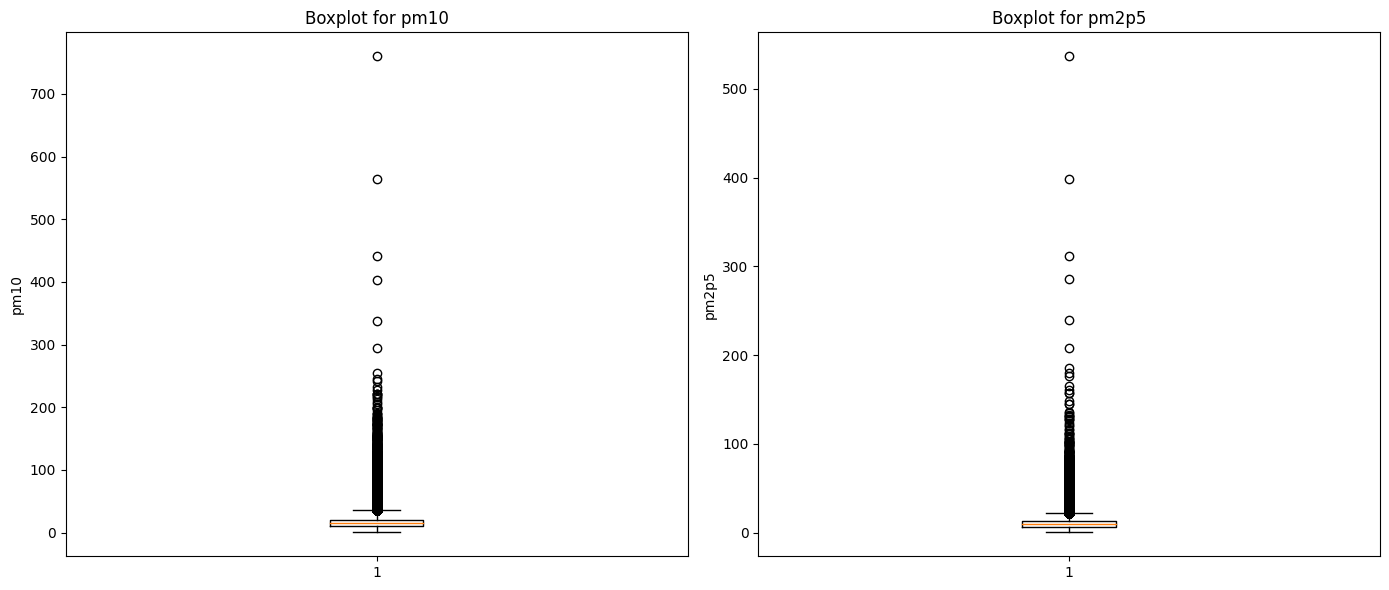

In [65]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for pm10
axs[0].boxplot(data['pm10'])
axs[0].set_title('Boxplot for pm10')
axs[0].set_ylabel('pm10')

# Boxplot for pm2p5
axs[1].boxplot(data['pm2p5'])
axs[1].set_title('Boxplot for pm2p5')
axs[1].set_ylabel('pm2p5')

# Show the plot
plt.tight_layout()
plt.show()

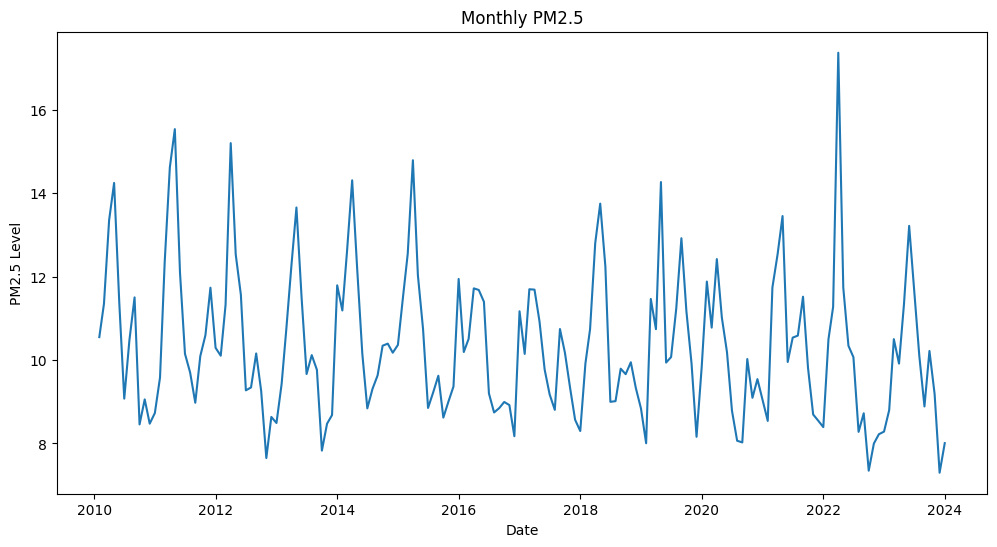

In [66]:
# Resample monthly and plot
monthly_data = data['pm2p5'].resample('M').mean()  # Resample to monthly and calculate mean

plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data.values)
plt.title('Monthly PM2.5')
plt.xlabel('Date')
plt.ylabel('PM2.5 Level')

plt.show()

In [67]:
data

,latitude,longitude,pm10,pm2p5
date,,,,
2023-01-16,35.0,-25.00,9.339834,4.953766
2023-01-16,35.0,-24.25,9.361186,4.983555
2023-01-16,35.0,-23.50,9.254733,4.944873
2023-01-16,35.0,-22.75,9.237041,4.952654
2023-01-16,35.0,-22.00,9.154990,4.912194
...,...,...,...,...
2011-12-16,69.5,36.50,7.782433,4.136192
2011-12-16,69.5,37.25,8.131811,4.293472
2011-12-16,69.5,38.00,8.672760,4.552857


# Model

In [68]:
from prophet import Prophet

In [69]:
# Slice data until 2021 for training
train_data = data[data.index.year <= 2021]

In [39]:
# Initialize Prophet model
model = Prophet(seasonality_mode='multiplicative')

train_data  = train_data .reset_index()
# Rename columns for Prophet (Prophet requires columns to be named 'ds' and 'y')
train_data  = train_data .rename(columns={'date': 'ds', 'pm2p5': 'y'})

In [15]:
train_data = train_data.sort_values('ds')
train_data

,ds,latitude,longitude,pm10,y
396631,2010-01-16,69.50,38.75,7.916942,4.133660
395261,2010-01-16,58.25,-10.00,21.698844,11.150150
395262,2010-01-16,58.25,-9.25,19.686997,10.172718
395263,2010-01-16,58.25,-8.50,17.456908,9.083541
395264,2010-01-16,58.25,-7.75,15.003559,7.898962
...,...,...,...,...,...
193551,2021-12-16,46.25,22.25,7.588968,5.310006
193552,2021-12-16,46.25,23.00,7.122884,4.983899
193553,2021-12-16,46.25,23.75,8.809492,6.175046
193540,2021-12-16,46.25,14.00,18.109653,12.751718


In [16]:
model.fit(train_data [['ds', 'y']])

19:53:34 - cmdstanpy - INFO - Chain [1] start processing
19:57:29 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
future = model.make_future_dataframe(periods=3650)

In [18]:
forecast = model.predict(future)

In [19]:
data.reset_index(inplace=True)

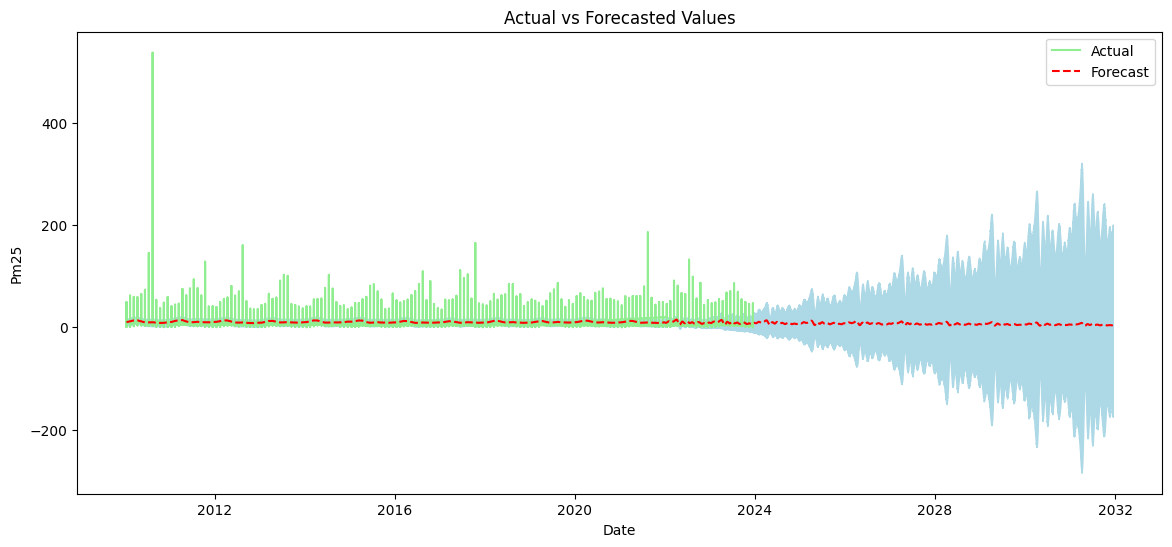

In [20]:
# Plot the forecast and real values
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(data['date'], data['pm2p5'], color='lightgreen', label='Actual')  # Plot actual values
ax.plot(forecast['ds'], forecast['yhat'], color='red', linestyle='--', label='Forecast')  # Plot forecasted values
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='lightblue')  # Uncertainty range
ax.set_xlabel('Date')
ax.set_ylabel('Pm25')
ax.legend()
plt.title('Actual vs Forecasted Values')
plt.show()

/home/dimia/.pyenv/versions/3.10.6/envs/air-pollution-levels/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/dimia/.pyenv/versions/3.10.6/envs/air-pollution-levels/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/dimia/.pyenv/versions/3.10.6/envs/air-pollution-levels/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated,

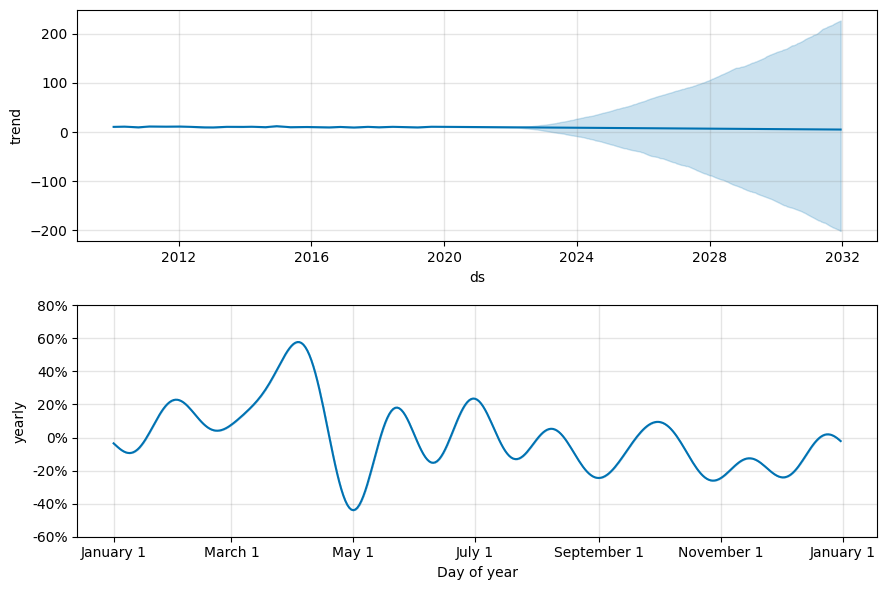

In [21]:
model.plot_components(forecast);

# Try to loc coordinates ...

22:25:49 - cmdstanpy - INFO - Chain [1] start processing
22:25:49 - cmdstanpy - INFO - Chain [1] done processing


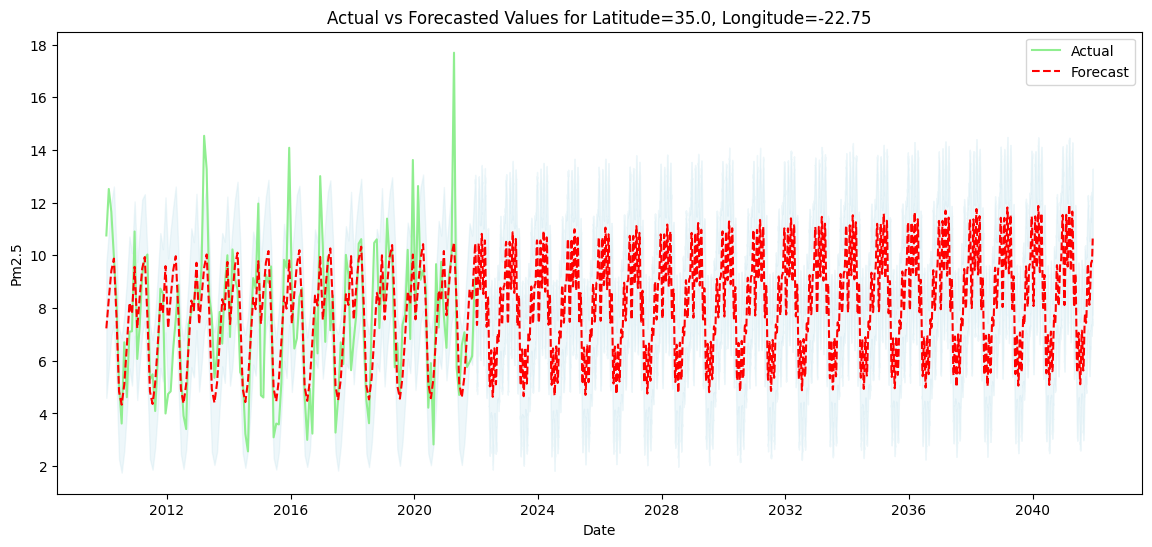

In [95]:
latitude = 35.0
longitude = -22.75
train_dataloc = train_data[(train_data['latitude'] == latitude) & (train_data['longitude'] == longitude)]
train_dataloc.reset_index(inplace=True)
# Initialize Prophet model
model = Prophet(seasonality_mode='multiplicative')

# Rename columns for Prophet (Prophet requires columns to be named 'ds' and 'y')
train_dataloc = train_dataloc.rename(columns={'date': 'ds', 'pm2p5': 'y'})

# Sort values by date (Prophet requires sorted data)
train_dataloc = train_dataloc.sort_values('ds')
# Fit the model
model.fit(train_dataloc[['ds', 'y']])

# Make future dataframe
future = model.make_future_dataframe(periods=7300)
# Predict
forecast = model.predict(future)

# Plot the forecast and real values
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(train_dataloc['ds'], train_dataloc['y'], color='lightgreen', label='Actual')  # Plot actual values
ax.plot(forecast['ds'], forecast['yhat'], color='red', linestyle='--', label='Forecast')  # Plot forecasted values
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='lightblue', alpha=0.2)  # Uncertainty range
ax.set_xlabel('Date')
ax.set_ylabel('Pm2.5')
ax.legend()
plt.title(f'Actual vs Forecasted Values for Latitude={latitude}, Longitude={longitude}')
plt.show()

/home/dimia/.pyenv/versions/3.10.6/envs/air-pollution-levels/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/dimia/.pyenv/versions/3.10.6/envs/air-pollution-levels/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/dimia/.pyenv/versions/3.10.6/envs/air-pollution-levels/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated,

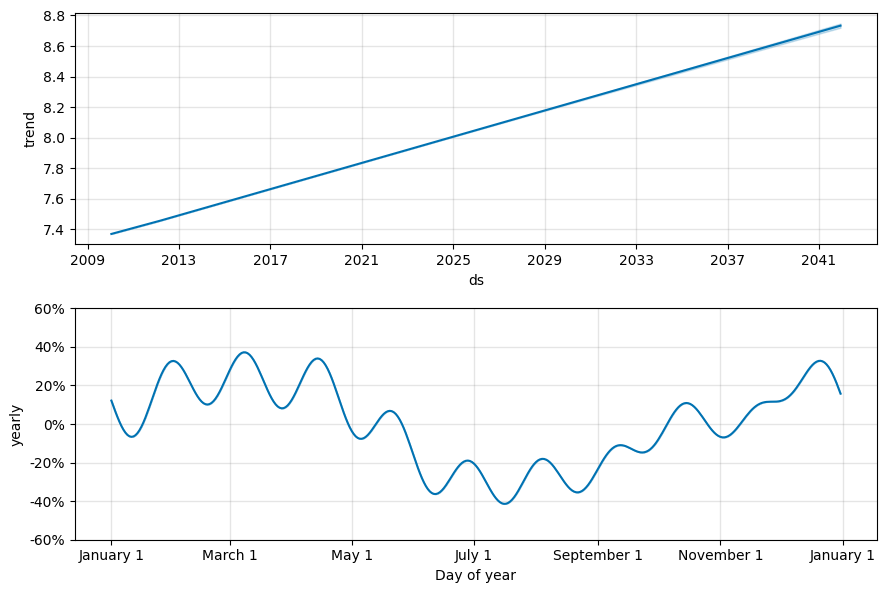

In [53]:
model.plot_components(forecast);

# Metrics

In [188]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from prophet.diagnostics import cross_validation, performance_metrics

In [185]:
train_data = data[data.index.year <= 2021]
test_data = data[data.index.year > 2021]

In [186]:
# Sort and reset index for Prophet
train_data.sort_values('date', inplace=True)
train_data.reset_index(inplace=True)

test_data.sort_values('date', inplace=True)
test_data.reset_index(inplace=True)


/tmp/ipykernel_134037/390670967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.sort_values('date', inplace=True)
/tmp/ipykernel_134037/390670967.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.sort_values('date', inplace=True)


In [191]:
train_data = train_data.rename(columns={'date': 'ds', 'pm2p5': 'y'})
model = Prophet(seasonality_mode='multiplicative')
# Fit the model on the training data
model.fit(train_data)


23:48:53 - cmdstanpy - INFO - Chain [1] start processing
23:52:15 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/19 [00:00<?, ?it/s]

23:52:36 - cmdstanpy - INFO - Chain [1] start processing
23:52:55 - cmdstanpy - INFO - Chain [1] done processing
23:53:04 - cmdstanpy - INFO - Chain [1] start processing
23:53:36 - cmdstanpy - INFO - Chain [1] done processing
23:53:45 - cmdstanpy - INFO - Chain [1] start processing
23:54:32 - cmdstanpy - INFO - Chain [1] done processing
23:54:41 - cmdstanpy - INFO - Chain [1] start processing
23:55:43 - cmdstanpy - INFO - Chain [1] done processing
23:55:53 - cmdstanpy - INFO - Chain [1] start processing
23:57:15 - cmdstanpy - INFO - Chain [1] done processing
23:57:25 - cmdstanpy - INFO - Chain [1] start processing
23:58:39 - cmdstanpy - INFO - Chain [1] done processing
23:58:50 - cmdstanpy - INFO - Chain [1] start processing
23:59:50 - cmdstanpy - INFO - Chain [1] done processing
00:00:01 - cmdstanpy - INFO - Chain [1] start processing
00:01:24 - cmdstanpy - INFO - Chain [1] done processing
00:01:35 - cmdstanpy - INFO - Chain [1] start processing
00:03:02 - cmdstanpy - INFO - Chain [1]

     horizon        mse      rmse       mae      mape     mdape     smape  \
0    42 days  33.048551  5.748787  3.957960  0.673390  0.307193  0.404442   
1    43 days  33.574344  5.794337  3.996095  0.651727  0.304506  0.399638   
2    44 days  33.896016  5.822029  4.022843  0.674159  0.301027  0.400612   
3    46 days  33.709370  5.805977  3.999907  0.671469  0.299917  0.398948   
4    47 days  33.065488  5.750260  3.956062  0.662451  0.294268  0.393792   
..       ...        ...       ...       ...       ...       ...       ...   
169 359 days  32.040733  5.660453  4.166088  0.737984  0.345110  0.431105   
170 360 days  31.986214  5.655636  4.163542  0.746354  0.346698  0.432046   
171 361 days  32.287343  5.682195  4.166012  0.739966  0.348497  0.431402   
172 364 days  32.263065  5.680058  4.158618  0.756456  0.345273  0.431908   
173 365 days  32.459495  5.697323  4.188586  0.778952  0.351736  0.437935   

     coverage  
0    0.863085  
1    0.861460  
2    0.855250  
3    0.8582

/home/dimia/.pyenv/versions/3.10.6/envs/air-pollution-levels/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/dimia/.pyenv/versions/3.10.6/envs/air-pollution-levels/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


<Figure size 1000x600 with 0 Axes>

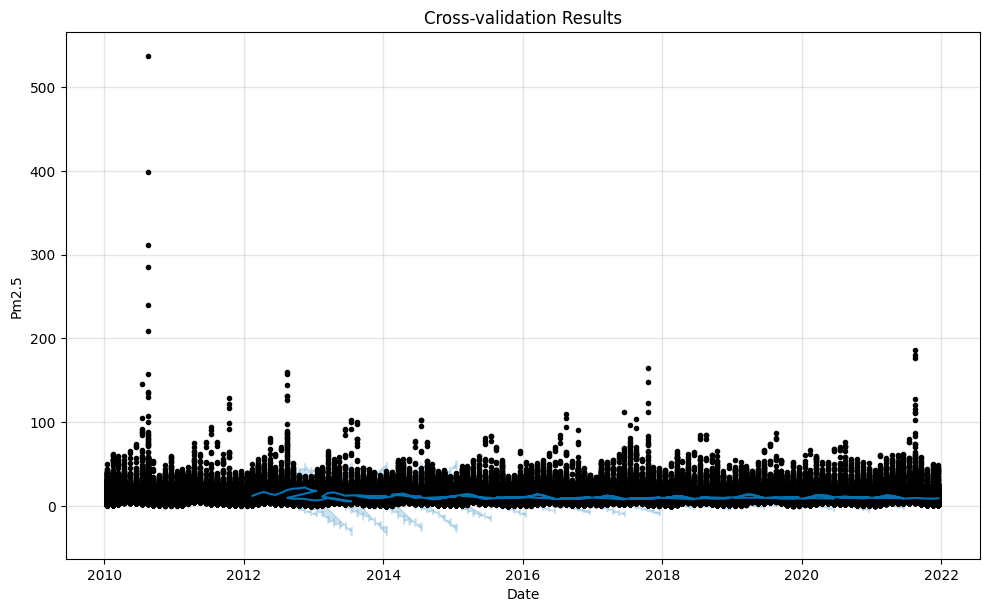

In [192]:
# Define cross-validation parameters
initial = '730 days'   # Initial training period (e.g., 2 years)
period = '180 days'    # Forecasting period (e.g., 6 months)
horizon = '365 days'   # Total period to forecast into the future (e.g., 1 year)

# Perform cross-validation
df_cv = cross_validation(model, initial=initial, period=period, horizon=horizon)

# Compute performance metrics
df_metrics = performance_metrics(df_cv)
print(df_metrics)

# Plot the cross-validation results
fig = plt.figure(figsize=(10, 6))
model.plot(df_cv, xlabel='Date', ylabel='Pm2.5')
plt.title('Cross-validation Results')
plt.show()

# Model with regressors

In [200]:
data

,latitude,longitude,pm10,pm2p5
date,,,,
2023-01-16,35.0,-25.00,9.339834,4.953766
2023-01-16,35.0,-24.25,9.361186,4.983555
2023-01-16,35.0,-23.50,9.254733,4.944873
2023-01-16,35.0,-22.75,9.237041,4.952654
2023-01-16,35.0,-22.00,9.154990,4.912194
...,...,...,...,...
2011-12-16,69.5,36.50,7.782433,4.136192
2011-12-16,69.5,37.25,8.131811,4.293472
2011-12-16,69.5,38.00,8.672760,4.552857


In [218]:
# Define your threshold for outliers and African Countries
threshold = 200
lat_min, lat_max = 20, 37
lon_min, lon_max = -10, 30

# Identify outliers
outliers = data[data['pm2p5'] > threshold]

# Remove outliers
cleaned_data = data[data['pm2p5'] <= threshold]

# Filter out North African data points
cleaned_data = cleaned_data[~((cleaned_data['latitude'] >= lat_min) & (cleaned_data['latitude'] <= lat_max) &
                              (cleaned_data['longitude'] >= lon_min) & (cleaned_data['longitude'] <= lon_max))]

# Print summary of data cleaning
print(f"After removing North African data and outliers, we have {len(cleaned_data)} monthly records remaining.")
# Reset index if needed for further processing


print(f"Cleaned data shape: {cleaned_data.shape}")

After removing North African data and outliers, we have 659730 monthly records remaining.
Cleaned data shape: (659730, 4)


In [219]:
cleaned_data

,latitude,longitude,pm10,pm2p5
date,,,,
2023-01-16,35.0,-25.00,9.339834,4.953766
2023-01-16,35.0,-24.25,9.361186,4.983555
2023-01-16,35.0,-23.50,9.254733,4.944873
2023-01-16,35.0,-22.75,9.237041,4.952654
2023-01-16,35.0,-22.00,9.154990,4.912194
...,...,...,...,...
2011-12-16,69.5,36.50,7.782433,4.136192
2011-12-16,69.5,37.25,8.131811,4.293472
2011-12-16,69.5,38.00,8.672760,4.552857


In [220]:
train_data = cleaned_data[cleaned_data.index.year <= 2021].copy()
test_data = cleaned_data[cleaned_data.index.year > 2021].copy()
# Sort and reset index for Prophet
train_data.sort_values('date', inplace=True)
train_data.reset_index(inplace=True)

test_data.sort_values('date', inplace=True)
test_data.reset_index(inplace=True)

In [223]:
# Rename columns to fit Prophet's requirements
train_data.rename(columns={'date': 'ds', 'pm2p5': 'y'}, inplace=True)
test_data.rename(columns={'date': 'ds', 'pm2p5': 'y'}, inplace=True)

In [240]:
# Ensure date column is in datetime format
train_data['ds'] = pd.to_datetime(train_data['ds'])
test_data['ds'] = pd.to_datetime(test_data['ds'])

In [243]:
test_data

,ds,latitude,longitude,pm10,y
0,2022-01-16,69.50,39.50,12.512789,6.399095
1,2022-01-16,58.25,32.00,4.061109,2.645632
2,2022-01-16,58.25,32.75,3.911302,2.541760
3,2022-01-16,58.25,33.50,3.802608,2.473064
4,2022-01-16,58.25,34.25,3.851605,2.515275
...,...,...,...,...,...
94243,2023-12-16,47.00,37.25,6.042220,4.161892
94244,2023-12-16,47.00,38.00,6.526293,4.529373
94245,2023-12-16,47.00,38.75,7.958076,5.550894
94246,2023-12-16,47.75,-25.00,30.898930,15.950401


In [334]:
# Initialize the Prophet Model with Regressors
params = {'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 0.1, 'interval_width': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}
model = Prophet(**params)
model.add_regressor('latitude')
model.add_regressor('longitude')
# Fit the model on the training data
model.fit(train_data[['ds', 'y', 'latitude', 'longitude']])

16:52:04 - cmdstanpy - INFO - Chain [1] start processing
16:55:43 - cmdstanpy - INFO - Chain [1] done processing


In [335]:

# Create the future dataframe starting from the minimum date in test_data
future = pd.DataFrame(test_data['ds'], columns=['ds'])

# Add latitude and longitude to the future dataframe
future['latitude'] = test_data['latitude']
future['longitude'] = test_data['longitude']
# Forecast using the Model
forecast = model.predict(future)


In [340]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,...,longitude,longitude_lower,longitude_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-16,9.441011,4.917351,6.151314,9.441011,9.441011,-3.955426,-3.955426,-3.955426,-3.702139,...,-0.804443,-0.804443,-0.804443,-0.253287,-0.253287,-0.253287,0.0,0.0,0.0,5.485584
1,2022-01-16,9.441011,12.736870,13.844620,9.441011,9.441011,3.625583,3.625583,3.625583,3.878870,...,0.743106,0.743106,0.743106,-0.253287,-0.253287,-0.253287,0.0,0.0,0.0,13.066594
2,2022-01-16,9.441011,12.497615,13.611727,9.441011,9.441011,3.606938,3.606938,3.606938,3.860225,...,0.724461,0.724461,0.724461,-0.253287,-0.253287,-0.253287,0.0,0.0,0.0,13.047949
3,2022-01-16,9.441011,12.687094,13.768531,9.441011,9.441011,3.588293,3.588293,3.588293,3.841580,...,0.705816,0.705816,0.705816,-0.253287,-0.253287,-0.253287,0.0,0.0,0.0,13.029303
4,2022-01-16,9.441011,12.497524,13.624438,9.441011,9.441011,3.569647,3.569647,3.569647,3.822934,...,0.687171,0.687171,0.687171,-0.253287,-0.253287,-0.253287,0.0,0.0,0.0,13.010658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94243,2023-12-16,8.471188,2.724141,4.837176,7.808765,9.034345,-4.377025,-4.377025,-4.377025,-3.608913,...,-0.711217,-0.711217,-0.711217,-0.768111,-0.768111,-0.768111,0.0,0.0,0.0,4.094164
94244,2023-12-16,8.471188,2.673047,5.357735,7.808716,9.034388,-4.395670,-4.395670,-4.395670,-3.627559,...,-0.729862,-0.729862,-0.729862,-0.768111,-0.768111,-0.768111,0.0,0.0,0.0,4.075518
94245,2023-12-16,8.471188,2.476526,4.607140,7.808668,9.034432,-4.414315,-4.414315,-4.414315,-3.646204,...,-0.748507,-0.748507,-0.748507,-0.768111,-0.768111,-0.768111,0.0,0.0,0.0,4.056873
94246,2023-12-16,8.471188,3.169072,5.268209,7.808619,9.034475,-3.686507,-3.686507,-3.686507,-2.918396,...,-0.151862,-0.151862,-0.151862,-0.768111,-0.768111,-0.768111,0.0,0.0,0.0,4.784681


Mean Absolute Error (MAE): 4.2592
Mean Squared Error (MSE): 33.1313
Root Mean Squared Error (RMSE): 5.7560
R² Score: -0.1788


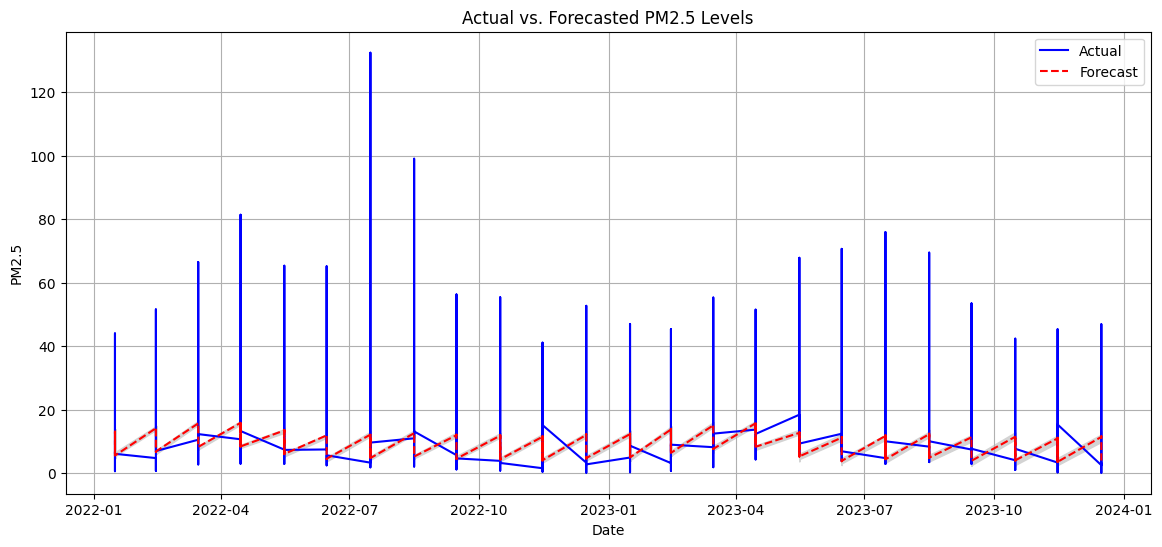

In [341]:


# Calculate metrics
actual_values = test_data['y']
predicted_values = forecast['yhat'].values

mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_values, predicted_values)
r2 = r2_score(actual_values, predicted_values)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot the forecast and actual values
plt.figure(figsize=(14, 6))
plt.plot(test_data['ds'], actual_values, label='Actual', color='blue')
plt.plot(test_data['ds'], predicted_values, label='Forecast', linestyle='--', color='red')
plt.fill_between(test_data['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='lightgray')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.title('Actual vs. Forecasted PM2.5 Levels')
plt.legend()
plt.grid(True)
plt.show()

# grid search

In [282]:
from sklearn.model_selection import ParameterGrid, TimeSeriesSplit

In [354]:
train_data.tail(20)

,ds,latitude,longitude,pm10,y
565462,2021-12-16,47.00,26.00,6.491367,4.510568
565463,2021-12-16,47.00,26.75,7.910105,5.516730
565464,2021-12-16,47.00,27.50,7.779499,5.434346
565465,2021-12-16,47.00,28.25,6.679337,4.651690
565466,2021-12-16,47.00,29.00,5.934115,4.118477
565467,2021-12-16,47.00,29.75,5.597613,3.867127
565468,2021-12-16,47.00,30.50,5.741023,3.963624
565469,2021-12-16,47.00,31.25,6.158962,4.280958
565470,2021-12-16,47.00,32.00,6.675239,4.658174
565471,2021-12-16,47.00,32.75,7.268343,5.097178


21:17:11 - cmdstanpy - INFO - Chain [1] start processing
21:17:11 - cmdstanpy - INFO - Chain [1] done processing
21:17:11 - cmdstanpy - INFO - Chain [1] start processing
21:17:11 - cmdstanpy - INFO - Chain [1] done processing
21:17:11 - cmdstanpy - INFO - Chain [1] start processing
21:17:11 - cmdstanpy - INFO - Chain [1] done processing
21:17:11 - cmdstanpy - INFO - Chain [1] start processing
21:17:11 - cmdstanpy - INFO - Chain [1] done processing
21:17:11 - cmdstanpy - INFO - Chain [1] start processing
21:17:11 - cmdstanpy - INFO - Chain [1] done processing
21:17:12 - cmdstanpy - INFO - Chain [1] start processing
21:17:12 - cmdstanpy - INFO - Chain [1] done processing
21:17:12 - cmdstanpy - INFO - Chain [1] start processing
21:17:12 - cmdstanpy - INFO - Chain [1] done processing
21:17:12 - cmdstanpy - INFO - Chain [1] start processing
21:17:12 - cmdstanpy - INFO - Chain [1] done processing
21:17:12 - cmdstanpy - INFO - Chain [1] start processing
21:17:12 - cmdstanpy - INFO - Chain [1]

Best Parameters (based on RMSE): {'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 1.0, 'interval_width': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}
RMSE: 2.2138
MAE: 1.7764
R² Score: 0.4615


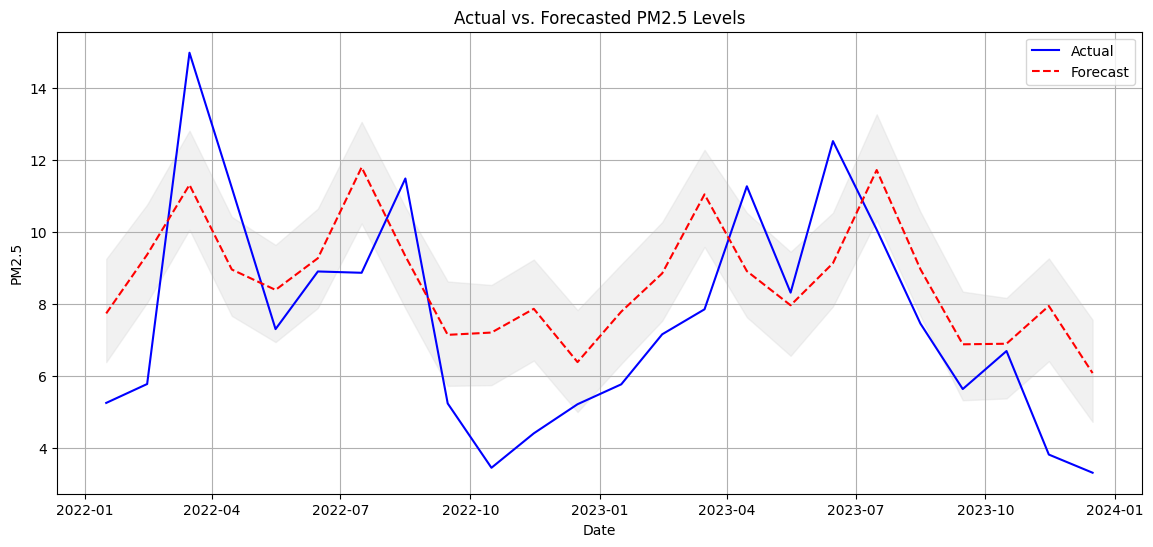

In [359]:
# Example: Filtering data for a specific city (latitude, longitude)
city_latitude = 47.00
city_longitude = 29.00

# Subset train_data and test_data for the specific city
train_city = train_data[(train_data['latitude'] == city_latitude) & (train_data['longitude'] == city_longitude)]
test_city = test_data[(test_data['latitude'] == city_latitude) & (test_data['longitude'] == city_longitude)]

# Define the parameter grid for Prophet
param_grid = {
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_prior_scale': [0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.1, 1.0, 10.0],
    'holidays_prior_scale': [1.0],
    'interval_width': [ 0.1 , 0.2 , 0.3 , 0.4, 0.5 ]
    }

# Initialize lists to store results
results = []

# Perform grid search
for params in ParameterGrid(param_grid):
    try:
        # Initialize Prophet model with specific parameters
        model = Prophet(**params)
        model.add_regressor('latitude')
        model.add_regressor('longitude')

        # Fit the model on the training data for the city
        model.fit(train_city[['ds', 'y', 'latitude', 'longitude']])
        #model.fit(train_city[['ds', 'y']])
        # Forecast using the model
        future = pd.DataFrame(test_city['ds'], columns=['ds'])
        future['latitude'] = city_latitude
        future['longitude'] = city_longitude
        forecast = model.predict(future)

        # Compute evaluation metrics
        actual_values = test_city['y']
        predicted_values = forecast['yhat']
        rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
        mae = mean_absolute_error(actual_values, predicted_values)
        r2 = r2_score(actual_values, predicted_values)

        # Store results
        results.append({
            'params': params,
            'rmse': rmse,
            'mae': mae,
            'r2': r2,
            'forecast': forecast
        })

    except Exception as e:
        print(f"Exception for parameters {params}: {str(e)}")

# Find best parameters based on RMSE
best_result = min(results, key=lambda x: x['rmse'])

# Print best parameters and metrics
print(f"Best Parameters (based on RMSE): {best_result['params']}")
print(f"RMSE: {best_result['rmse']:.4f}")
print(f"MAE: {best_result['mae']:.4f}")
print(f"R² Score: {best_result['r2']:.4f}")

# Plot actual vs. forecasted values
plt.figure(figsize=(14, 6))
plt.plot(test_city['ds'], actual_values, label='Actual', color='blue')
plt.plot(test_city['ds'], predicted_values, label='Forecast', linestyle='--', color='red')
plt.fill_between(test_city['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='lightgray', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.title('Actual vs. Forecasted PM2.5 Levels')
plt.legend()
plt.grid(True)
plt.show()

/home/dimia/.pyenv/versions/3.10.6/envs/air-pollution-levels/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/dimia/.pyenv/versions/3.10.6/envs/air-pollution-levels/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/dimia/.pyenv/versions/3.10.6/envs/air-pollution-levels/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated,

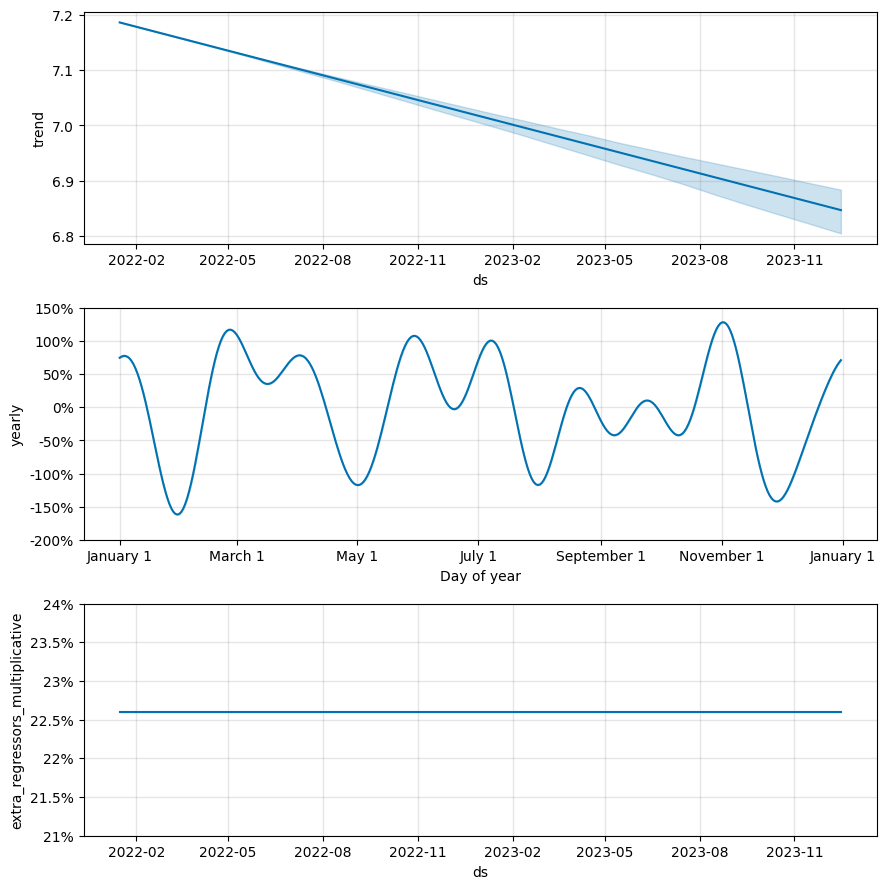

In [360]:
model.plot_components(forecast);